# Xarray Showcase
This notebook closely follows the Earth and Enviromental Data Science course at https://earth-env-data-science.github.io/intro.html

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
import urllib
import pandas as pd
import numpy as np
import xarray as xr
%matplotlib inline

# Atmospheric Radiation Data

In [5]:
# 1.1) Open the dataset and display its contents
data = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc.')
data.head()

<xarray.Dataset>
Dimensions:                      (lat: 5, lon: 5, time: 5)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 3.5 4.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2000-07-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [31]:
# 1.2) Print out the long_name attribute of each variable
indexArray = []
for index in data:
    print(data[index].long_name)
    indexArray.append(data[index].long_name)

Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
Incoming Solar Flux, Monthly Means
Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Pressure, Monthly Means, Daytime-and-Nighttime conditions
Cloud Effective Temperature, Monthly Means, Daytime-and-Nighttime conditions
Cloud Visible Optical Depth, Monthly Means, Daytime conditions


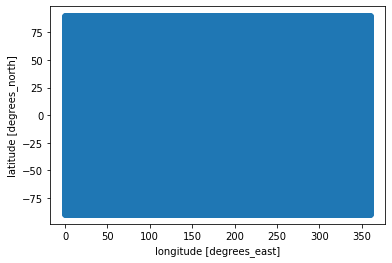

In [45]:
# 2.1) Calculate the time-mean of the entire dataseth
timeMean = data.mean(dim=['time'])

timeMean.plot.scatter(x = 'lon', y = 'lat')
